## Page View Time Series Visualizer
For this project, I will visualize time series data using a line chart and bar chart . I will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

I will Use the data to complete the following tasks:

* Use Pandas to import the data from OS. Set the index to the "date" column.
* Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
* Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".
* Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".

In [53]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
df= pd.read_csv(r'C:\Users\osakue\Desktop\PROJECT DATA\fcc-forum-pageviews.csv')

In [6]:
df.head(5)

,date,value
10,2016-05-19,19736
17,2016-05-26,18060
18,2016-05-27,19997
19,2016-05-28,19044
20,2016-05-29,20325


In [4]:
# Clean data
df = df[ df["value"].between( df["value"].quantile(.025), df["value"].quantile(.975) ) ]

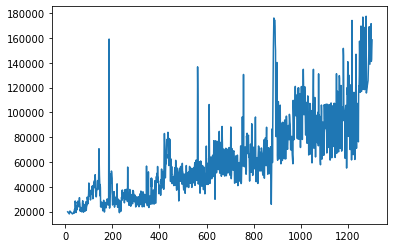

In [5]:
# Draw line plot
plt.plot(df['value'])

In [30]:
# Copy and modify data for monthly bar plot
df_bar = df.copy()
df_bar["year"] = pd.DatetimeIndex(df.date).year
df_bar["month"] = pd.DatetimeIndex(df.date).month_name()
df_bar

,date,value,year,month
10,2016-05-19,19736,2016,May
17,2016-05-26,18060,2016,May
18,2016-05-27,19997,2016,May
19,2016-05-28,19044,2016,May
20,2016-05-29,20325,2016,May
...,...,...,...,...
1294,2019-11-24,138875,2019,November
1299,2019-11-29,171584,2019,November
1300,2019-11-30,141161,2019,November
1301,2019-12-01,142918,2019,December


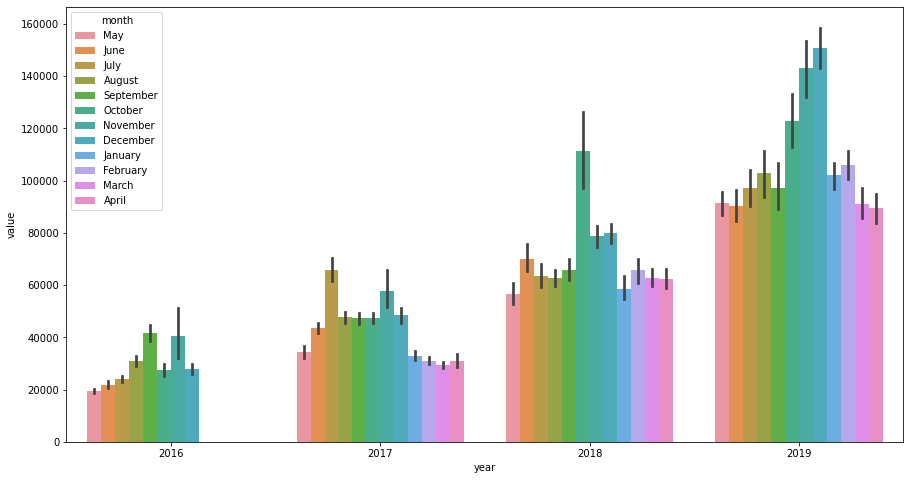

In [52]:
fig, ax = plt.subplots(figsize=(15,8))

ax =sns.barplot(x='year', y='value', hue='month',  data=df_bar);
